# Esercizio 3 - Titanic

## 1. Dimensioni: verifica quante osservazioni (righe) e quante caratteristiche (colonne) compongono il dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# Configurazione dello stile dei grafici
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Librerie importate con successo!")

# Caricamento del dataset
df = sns.load_dataset('titanic')

print(f"Dimensioni del dataset: {df.shape}")
print(f"\nColonne: {list(df.columns)}")

✓ Librerie importate con successo!
Dimensioni del dataset: (891, 15)

Colonne: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


## 2. Anteprima: osserva le prime righe dei dati per avere un'idea concreta dei valori contenuti

In [2]:
print("\nPrime righe del dataset:")
df.head(10)


Prime righe del dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## 3. Tipi e valori mancanti: ispeziona il tipo di dato di ogni colonna (numerico, testuale, ecc.) e controlla se ci sono dati mancanti che potrebbero invalidare l'analisi

In [3]:
# Tipi e valori mancanti
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 4. Statistica descrittiva: genera un prospetto che mostri la media, la deviazione standard e i quartili di tutte le variabili numeriche

In [4]:
# Statistiche descrittive
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 5. Target analysis: calcola la frequenza dei sopravvissuti rispetto ai non sopravvissuti.

In [5]:
sopravvissuti = df['survived'].value_counts()
print(sopravvissuti)
print(df['survived'].value_counts(normalize=True) * 100)

survived
0    549
1    342
Name: count, dtype: int64
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


## Analisi Univariata

### 1. Bilanciamento della Sopravvivenza: crea un grafico a barre per visualizzare il numero di passeggeri sopravvissuti rispetto a quelli deceduti.

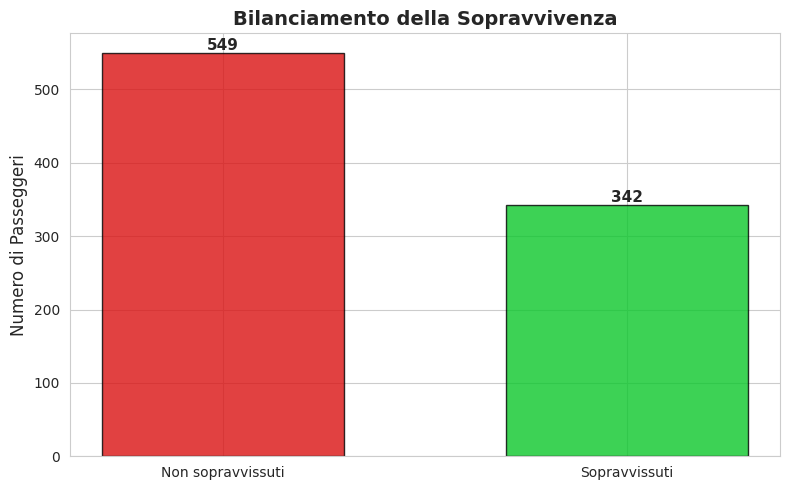

In [6]:
plt.figure(figsize=(8, 5))
survival_labels = ['Non sopravvissuti', 'Sopravvissuti']
colors = ["#DA1212", "#0CC72B"]
bars = plt.bar(survival_labels, sopravvissuti.values, color=colors, edgecolor='black', alpha=0.8, width=0.6)

plt.ylabel('Numero di Passeggeri', fontsize=12)
plt.title('Bilanciamento della Sopravvivenza', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

### 2. Profilo dell'Età: genera un istogramma per osservare come si distribuivano le età dei passeggeri a bordo. Utilizza una granularità molto fine (80 bin) per evidenziare la presenza di neonati o anziani.

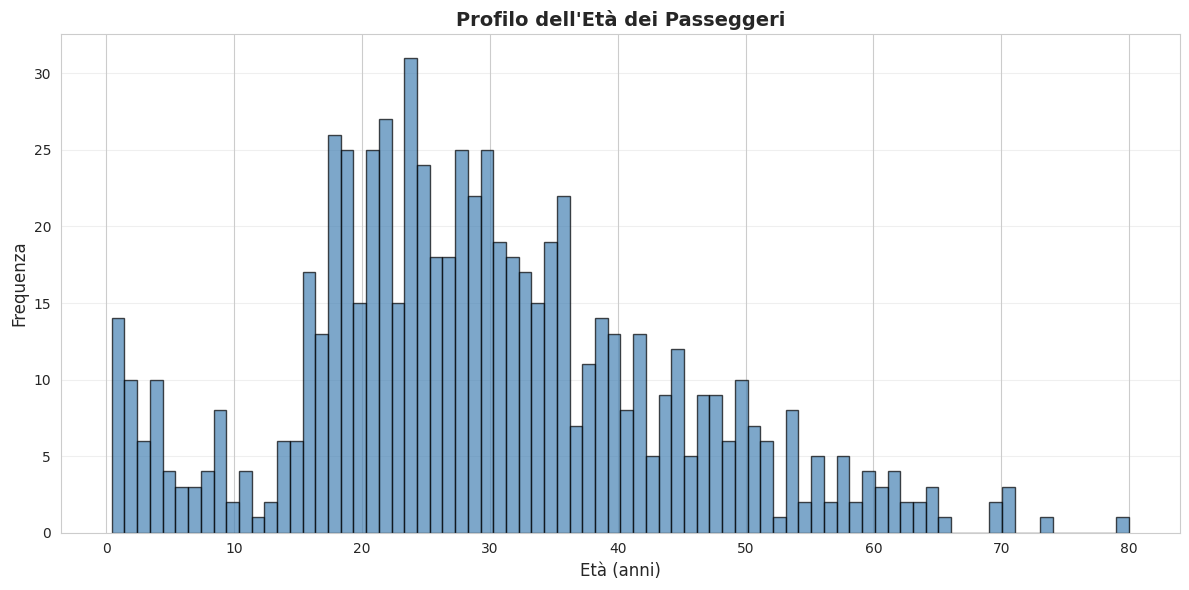

In [7]:
plt.figure(figsize=(12, 6))
plt.hist(df['age'], bins=80, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Età (anni)', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.title('Profilo dell\'Età dei Passeggeri', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Analisi di Correlazione

### 1. Mappa delle Relazioni: Seleziona le variabili numeriche e calcola la loro correlazione. Rappresenta i risultati con una mappa di calore (heatmap) per evidenziare quali caratteristiche (es. tariffa, classe, età) sono più legate alla sopravvivenza.

Matrice di Correlazione:
          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


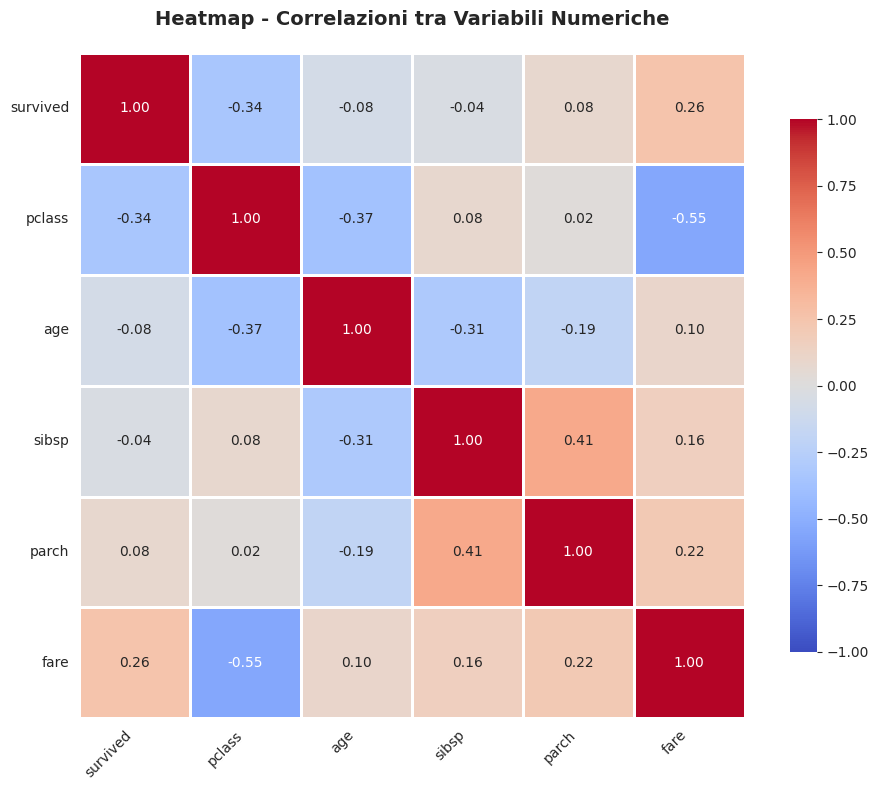


Caratteristiche legate alla sopravvivenza:
1. pclass: 0.3385
2. fare: 0.2573
3. parch: 0.0816
4. age: 0.0772
5. sibsp: 0.0353


In [8]:
# Seleziona solo le variabili numeriche
numeric_df = df.select_dtypes(include='number')

# Calcola la matrice di correlazione
correlation_matrix = numeric_df.corr()

print("Matrice di Correlazione:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Heatmap - Correlazioni tra Variabili Numeriche', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top fattori correlati a Survived
print("\nCaratteristiche legate alla sopravvivenza:")
correlazioneSopravvissuti = correlation_matrix['survived'].drop('survived').abs().sort_values(ascending=False)
for i, (factor, corr) in enumerate(correlazioneSopravvissuti.items(), 1):
    print(f"{i}. {factor}: {corr:.4f}")

## Analisi Bivariata e Multivariata

### 1. Età e Classe sociale: utilizza un boxplot per confrontare la distribuzione delle età tra le diverse classi di viaggio (1ª, 2ª e 3ª).

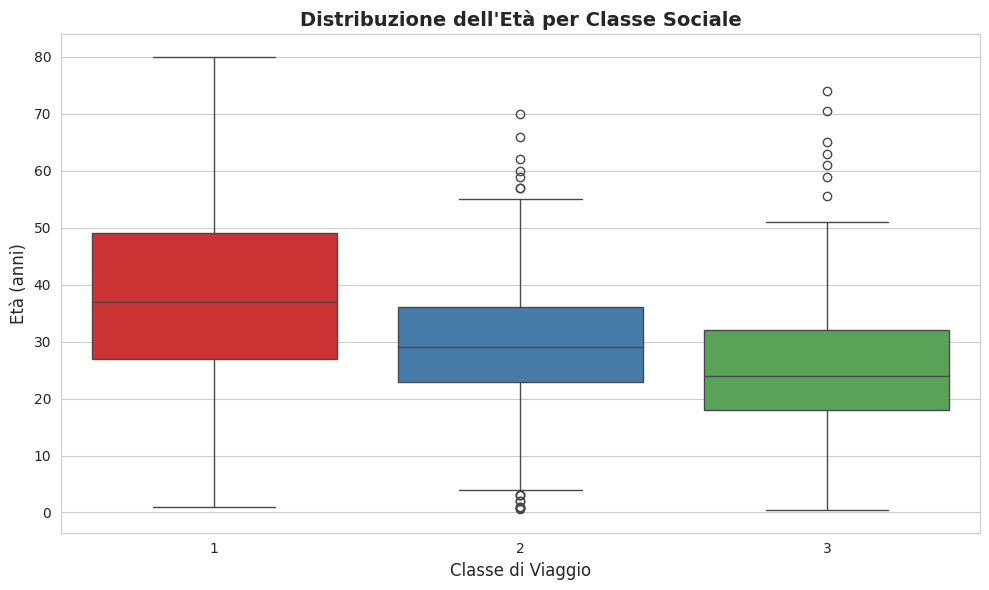

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='pclass', y='age',hue='pclass', palette='Set1', legend=False)
plt.xlabel('Classe di Viaggio', fontsize=12)
plt.ylabel('Età (anni)', fontsize=12)
plt.title('Distribuzione dell\'Età per Classe Sociale', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2. Genere e Sopravvivenza: rappresenta graficamente il numero di sopravvissuti e non, suddividendoli per genere per verificare l'impatto della regola "prima le donne e i bambini".

<Figure size 1000x600 with 0 Axes>

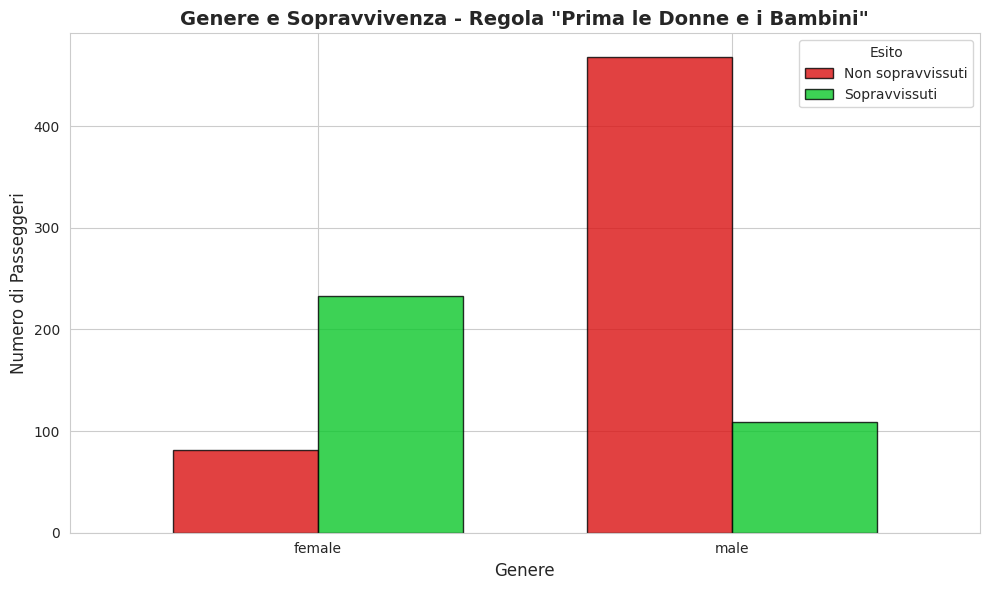

In [10]:
plt.figure(figsize=(10, 6))
Tabella = df.value_counts(['sex', 'survived']).unstack()


Tabella.plot(kind='bar', color=["#DA1212", "#0CC72B"], edgecolor='black', alpha=0.8, width=0.7)
plt.xlabel('Genere', fontsize=12)
plt.ylabel('Numero di Passeggeri', fontsize=12)
plt.title('Genere e Sopravvivenza - Regola "Prima le Donne e i Bambini"', fontsize=14, fontweight='bold')
plt.legend(['Non sopravvissuti', 'Sopravvissuti'], title='Esito')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 3. Classe e Sopravvivenza: visualizza il conteggio dei superstiti in base alla classe di viaggio per capire se lo status sociale ha influenzato le possibilità di salvezza.

<Figure size 1000x600 with 0 Axes>

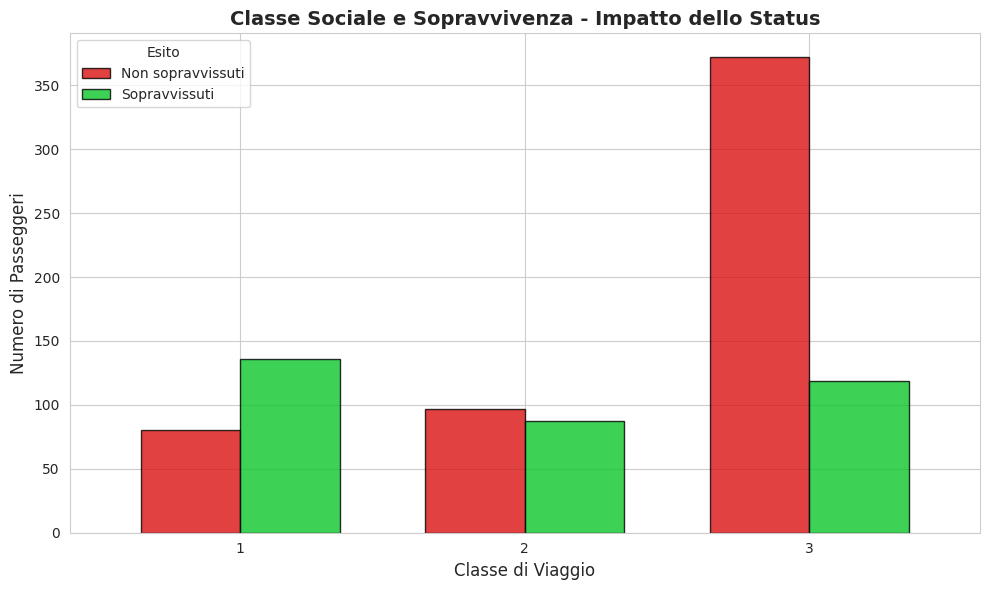

In [11]:
plt.figure(figsize=(10, 6))
sopravvissuti_classe = df.value_counts(['pclass', 'survived']).unstack()
sopravvissuti_classe.plot(kind='bar', color=["#DA1212", "#0CC72B"], edgecolor='black', alpha=0.8, width=0.7)

plt.xlabel('Classe di Viaggio', fontsize=12)
plt.ylabel('Numero di Passeggeri', fontsize=12)
plt.title('Classe Sociale e Sopravvivenza - Impatto dello Status', fontsize=14, fontweight='bold')
plt.legend(['Non sopravvissuti', 'Sopravvissuti'], title='Esito')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 4. Costo del biglietto vs Età: crea uno scatter plot per analizzare la relazione tra l'età dei passeggeri e la tariffa pagata, distinguendo i punti in base alla classe di appartenenza.

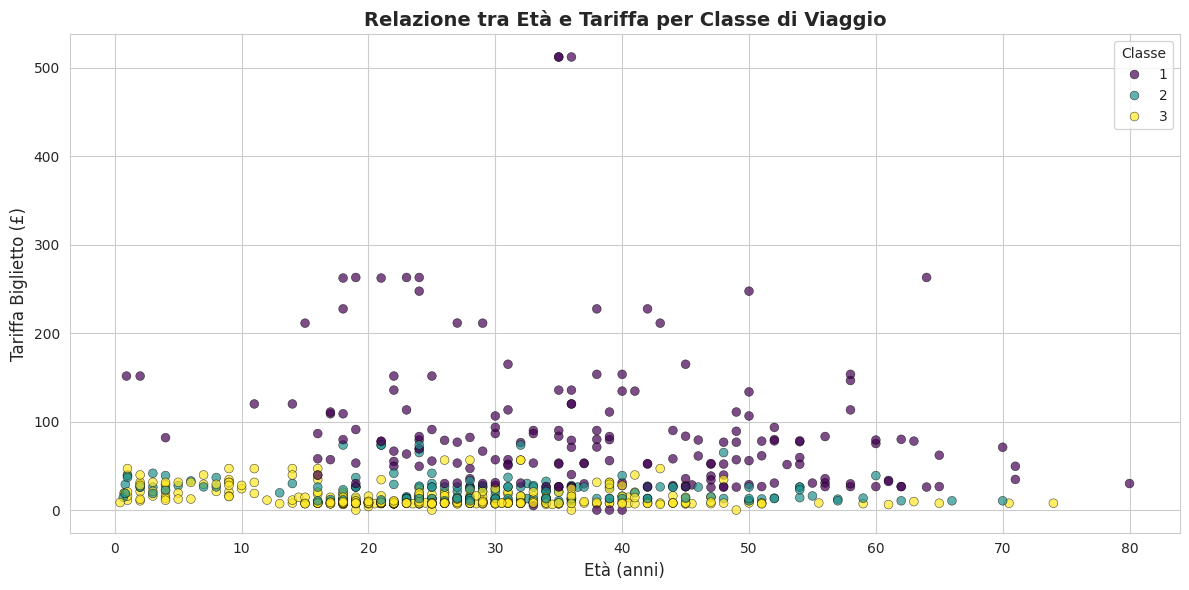

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='pclass', palette='viridis', alpha=0.7, edgecolor='black', linewidth=0.4, s=40)
plt.xlabel('Età (anni)', fontsize=12)
plt.ylabel('Tariffa Biglietto (£)', fontsize=12)
plt.title('Relazione tra Età e Tariffa per Classe di Viaggio', fontsize=14, fontweight='bold')
plt.legend(title='Classe')
plt.tight_layout()
plt.show()

### 5. Confronto distribuzioni sopravvissuti: crea una griglia di grafici che mostri, fianco a fianco, l'istogramma dell'età per chi è sopravvissuto e per chi non ce l'ha fatta.

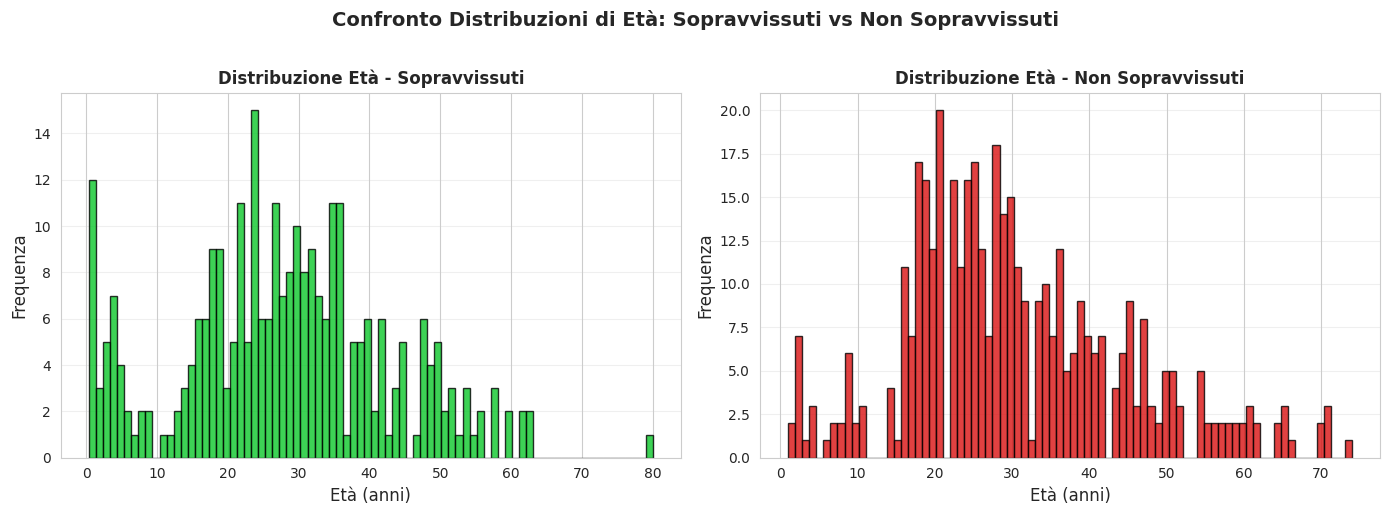

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Istogramma per sopravvissuti
sopravvissuti_data = df[df['survived'] == 1]['age']
axes[0].hist(sopravvissuti_data, bins=80, color='#0CC72B', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Età (anni)', fontsize=12)
axes[0].set_ylabel('Frequenza', fontsize=12)
axes[0].set_title('Distribuzione Età - Sopravvissuti', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3) 

# Istogramma per non sopravvissuti
morti = df[df['survived'] == 0]['age']
axes[1].hist(morti, bins=80, color='#DA1212', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Età (anni)', fontsize=12)
axes[1].set_ylabel('Frequenza', fontsize=12)
axes[1].set_title('Distribuzione Età - Non Sopravvissuti', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Confronto Distribuzioni di Età: Sopravvissuti vs Non Sopravvissuti', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# PREPROCESSING

## distribuzione della variabile targhet

Distribuzione della variabile target (alone):
alone
True     537
False    354
Name: count, dtype: int64

Percentuali:
alone
True     60.26936
False    39.73064
Name: proportion, dtype: float64


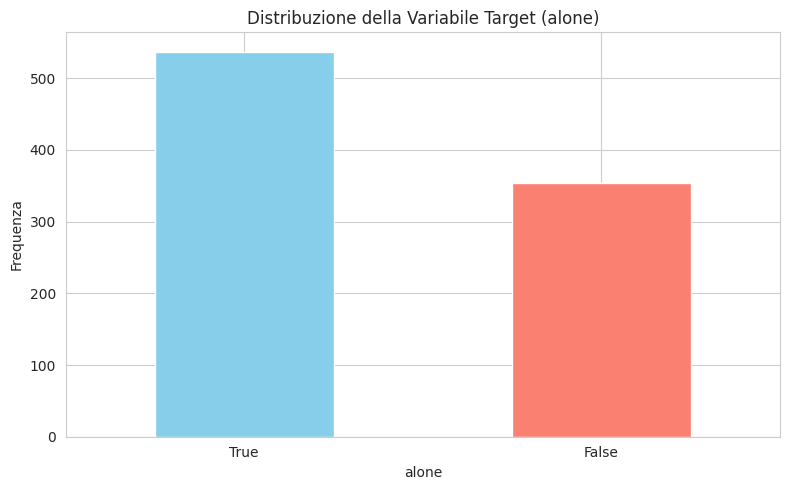

In [14]:
# Distribuzione della variabile target
print("Distribuzione della variabile target (alone):")
print(df['alone'].value_counts())
print("\nPercentuali:")
print(df['alone'].value_counts(normalize=True) * 100)

# Visualizzazione
plt.figure(figsize=(8, 5))
df['alone'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuzione della Variabile Target (alone)')
plt.xlabel('alone')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# GESTIONE VALORI MANCANTI


In [15]:
# Controllo dei valori mancanti (incluso '?')
print("Valori mancanti per colonna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Valori mancanti per colonna:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [16]:
# Imposta una soglia di valori mancanti (40%)
percentuale_scarto = 40.0
percentuale_nulli = (df.isnull().sum() / len(df)) * 100

# Identifica le colonne da eliminare
columns_to_drop = percentuale_nulli[percentuale_nulli > percentuale_scarto].index.tolist()

print(f"Colonne con più del 40% di valori mancanti:")
print(columns_to_drop)

# Elimina le colonne
df = df.drop(columns=columns_to_drop)

print(f"\nColonne eliminate: {columns_to_drop}")
print(f"Nuove dimensioni del dataset: {df.shape}")

Colonne con più del 40% di valori mancanti:
['deck']

Colonne eliminate: ['deck']
Nuove dimensioni del dataset: (891, 14)


In [17]:
# Gestione dei valori mancanti
# Per le colonne categoriche, sostituiamo con la moda
# Per le colonne numeriche, sostituiamo con la mediana
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            # Sostituiamo con la moda per le categoriche
            mode_value = df[col].mode()[0]
            count_sostituiti=df[col].isnull().sum()
            df[col].fillna(mode_value, inplace=True)
            print(f"Colonna '{col}': sostituiti {count_sostituiti} valori mancanti con '{mode_value}' (moda)")
        else:
            # Sostituiamo con la mediana per le numeriche
            median_value = df[col].median()
            count_sostituiti=df[col].isnull().sum()
            df[col].fillna(median_value, inplace=True)
            print(f"Colonna '{col}': sostituiti {count_sostituiti} valori mancanti con {median_value} (mediana)")

print("\nVerifica finale dei valori mancanti:")
print(df.isnull().sum().sum())

Colonna 'age': sostituiti 177 valori mancanti con 28.0 (mediana)
Colonna 'embarked': sostituiti 2 valori mancanti con 'S' (moda)
Colonna 'embark_town': sostituiti 2 valori mancanti con 'Southampton' (moda)

Verifica finale dei valori mancanti:
0


# SEPARAZIONE TRA COLONNE NUMERICHE E CATEGORICHE

In [18]:
# Identificazione delle colonne numeriche e categoriche
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
category_cols= df.select_dtypes(include=['category']).columns.tolist()
bool_cols=df.select_dtypes(include=['bool']).columns.tolist()


# Rimuoviamo la variabile target dalla lista delle categoriche
if 'alone' in categorical_cols:
    categorical_cols.remove('alone')

print(f"Colonne numeriche ({len(numerical_cols)}): {numerical_cols}")
print(f"\nColonne categoriche ({len(categorical_cols)}): {categorical_cols}")
print(f"\nColonne category ({len(category_cols)}): {category_cols}")
print(f"\nColonne bool ({len(bool_cols)}): {bool_cols}")


Colonne numeriche (6): ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

Colonne categoriche (5): ['sex', 'embarked', 'who', 'embark_town', 'alive']

Colonne category (1): ['class']

Colonne bool (2): ['adult_male', 'alone']


# ENCODING VARIABILI

In [19]:



# encoding delle colonne con dati di tipo category
le = LabelEncoder()
for col in category_cols:
    df[col] = le.fit_transform(df[col])



# encoding delle colonne con dati di tipo bool
for col in bool_cols:
    df[col] = df[col].astype(int)


# encoding delle colonne con dati di tipo object --- va messo per ultimo se no non vede le modifiche fatte a category e bool
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


print(f"Forma del dataset originale: {df.shape}")
print(f"Forma del dataset codificato: {df_encoded.shape}")




Forma del dataset originale: (891, 14)
Forma del dataset codificato: (891, 17)


In [20]:
print("\nPrime 10 righe del dataset encodato:")
print(df_encoded.head(5))


Prime 10 righe del dataset encodato:
   survived  pclass   age  sibsp  parch     fare  class  adult_male  alone  \
0         0       3  22.0      1      0   7.2500      2           1      0   
1         1       1  38.0      1      0  71.2833      0           0      0   
2         1       3  26.0      0      0   7.9250      2           0      1   
3         1       1  35.0      1      0  53.1000      0           0      0   
4         0       3  35.0      0      0   8.0500      2           1      1   

   sex_male  embarked_Q  embarked_S  who_man  who_woman  \
0      True       False        True     True      False   
1     False       False       False    False       True   
2     False       False        True    False       True   
3     False       False        True    False       True   
4      True       False        True     True      False   

   embark_town_Queenstown  embark_town_Southampton  alive_yes  
0                   False                     True      False  
1         

# SEPARAZIONE DELLE FEATURE DAL TARGET

In [21]:
# Separazione delle feature e del target
X = df_encoded.drop('alone', axis=1)
y = df_encoded['alone']

print(f"Shape delle feature (X): {X.shape}")
print(f"Shape del target (y): {y.shape}")
print(f"\nDistribuzione del target:")
print(y.value_counts())

Shape delle feature (X): (891, 16)
Shape del target (y): (891,)

Distribuzione del target:
alone
1    537
0    354
Name: count, dtype: int64


# SUDDIVISIONE TRAIN & TEST

In [22]:
# Split train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Manteniamo la stessa proporzione delle classi
)

print(f"Dimensioni del training set: {X_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}")
print(f"\nDistribuzione delle classi nel training set:")
print(y_train.value_counts())
print(f"\nDistribuzione delle classi nel test set:")
print(y_test.value_counts())

Dimensioni del training set: (712, 16)
Dimensioni del test set: (179, 16)

Distribuzione delle classi nel training set:
alone
1    429
0    283
Name: count, dtype: int64

Distribuzione delle classi nel test set:
alone
1    108
0     71
Name: count, dtype: int64


# BILANCIAMENTO

In [23]:
# Applicazione di SMOTE al training set
print("Applicazione di SMOTE per bilanciare le classi...")

# Inizializzazione di SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)

# Applicazione di SMOTE solo al training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nSMOTE applicato con successo!")
print(f"\nDimensioni PRIMA di SMOTE:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"\nDimensioni DOPO SMOTE:")
print(f"X_train_balanced: {X_train_balanced.shape}")
print(f"y_train_balanced: {y_train_balanced.shape}")

Applicazione di SMOTE per bilanciare le classi...

SMOTE applicato con successo!

Dimensioni PRIMA di SMOTE:
X_train: (712, 16)
y_train: (712,)

Dimensioni DOPO SMOTE:
X_train_balanced: (858, 16)
y_train_balanced: (858,)


# NORMALIZZAZIONE

In [24]:
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)
